# DT
---

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
wine = pd.read_csv('./dataset/winequality-red.csv', delimiter=';')

In [28]:
wine.shape

(1599, 12)

In [29]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [31]:
df = wine.copy()

In [32]:
def c(x):
    if x >= 6:
        return 1
    else:
        return 0

In [33]:
df['target'] = df['quality'].apply(c)

# df['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [34]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [35]:
df = df.drop(['quality'], axis=1)

In [41]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [40]:
# 데이터 분리
X = df.iloc[:,:11]

In [43]:
y = df['target']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2022)

In [45]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

In [48]:
# 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)


In [50]:
X_test_scaled = ss.transform(X_test)

In [51]:
# 모델 학습
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [53]:
y_pred = dt.predict(X_test_scaled)

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.765625

In [55]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)   # (정답값, 예측값)
cfm

array([[110,  42],
       [ 33, 135]], dtype=int64)

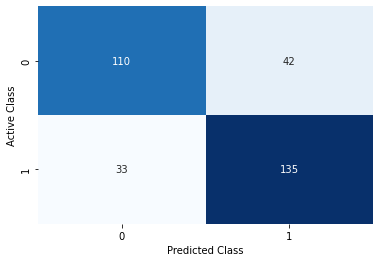

In [56]:
plt.figure(figsize=(6,4))
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='Blues')  # fmt : 포멧을 int형으로 설정
plt.ylabel('Active Class')
plt.xlabel('Predicted Class')
plt.show()

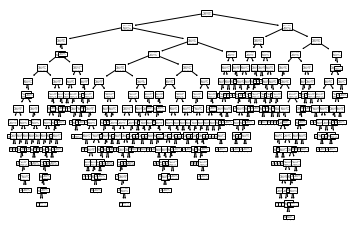

In [58]:
from sklearn.tree import plot_tree

plot_tree(dt)
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

param = {
    'criterion':['gini','entropy'],
    'max_depth' : range(1,20),
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,3],
    'max_leaf_nodes':[None,2,3,4,5,6,7],
}

model = DecisionTreeClassifier()
grid = GridSearchCV(model, param, refit = True)  
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'max_leaf_nodes': [None, 2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6]})

In [ ]:
# param_grid = {
#     'criterion':['gini','entropy'], 
#     'max_depth':[None,2,3,4,5,6], 
#     'max_leaf_nodes':[None,2,3,4,5,6,7], 
#     'min_samples_split':[2,3,4,5,6], 
#     'min_samples_leaf':[1,2,3], 
#     max_features:[None,'sqrt','log2',3,4,5]
# }

In [70]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [71]:
best_dt = grid.best_estimator_

In [72]:
y_pred = best_dt.predict(X_test_scaled)

In [73]:
accuracy_score(y_test, y_pred)

0.771875

In [75]:
from sklearn import svm

param = {
    'C' : range(1,100),
    'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1., 5],  # 그리드서치 범위 지정
    'kernel' : ['rbf']
}

model = svm.SVC()
grid = GridSearchCV(model,param, refit = True)  

grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 100),
                         'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5],
                         'kernel': ['rbf']})

In [76]:
grid.best_params_

{'C': 20, 'gamma': 0.05, 'kernel': 'rbf'}

In [77]:
best_clf = grid.best_estimator_

In [78]:
y_pred = best_clf.predict(X_test_scaled)

In [79]:
accuracy_score(y_test, y_pred)

0.765625

In [80]:
best_dt.feature_importances_

array([0.08601333, 0.09881136, 0.04577028, 0.07207226, 0.0620578 ,
       0.04693269, 0.07650613, 0.08777738, 0.05868912, 0.11681039,
       0.24855926])

In [81]:
for name, value in zip(X.columns, best_dt.feature_importances_):
    print(name, value)

fixed acidity 0.08601333240631887
volatile acidity 0.09881136480083323
citric acid 0.04577027579363019
residual sugar 0.07207226333802316
chlorides 0.06205779781609925
free sulfur dioxide 0.0469326945386037
total sulfur dioxide 0.07650612642039575
density 0.08777737691831931
pH 0.058689119749440036
sulphates 0.11681039076815751
alcohol 0.24855925745017912


In [84]:
sr = pd.Series(best_dt.feature_importances_, index=X.columns)

In [86]:
sr = sr.sort_values(ascending=False)

In [88]:
sr

alcohol                 0.248559
sulphates               0.116810
volatile acidity        0.098811
density                 0.087777
fixed acidity           0.086013
total sulfur dioxide    0.076506
residual sugar          0.072072
chlorides               0.062058
pH                      0.058689
free sulfur dioxide     0.046933
citric acid             0.045770
dtype: float64

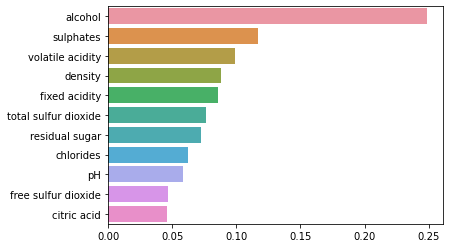

In [90]:
sns.barplot(x=sr, y=sr.index)
plt.show()

In [95]:
# 모델 납품
# pickle 

import pickle

pickle.dump(best_dt, open("my_dt_wine.pkl",'wb'), protocol=4)  # dump : 메모리 그 상태로 저장

In [94]:
!python --version

Python 3.8.0


In [96]:
# 납품 모델 확인
# 로딩

my_dt = pickle.load(open('my_dt_wine.pkl','rb'))

In [97]:
my_dt.predict(X_test_scaled)

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

## random forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [101]:
y_pred = rfc.predict(X_test_scaled)

In [102]:
accuracy_score(y_test, y_pred)

0.83125

In [112]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : range(50,200,10),
    'max_depth' : range(5,10),
    'min_samples_leaf': range(5,20),
}

model = RandomForestClassifier()
grid = GridSearchCV(model, param, refit = True)  
grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(5, 20),
                         'n_estimators': range(50, 200, 10)})

In [113]:
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 5, 'n_estimators': 80}

In [114]:
best_rfc = grid.best_estimator_

In [115]:
y_pred = best_rfc.predict(X_test_scaled)

In [116]:
accuracy_score(y_test, y_pred)

0.796875